# Name- Arjun dey¶


# Task5- Exploratory Data Analysis- Sports¶
Importing important libraries

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')


In [22]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [23]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35.0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0.0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0.0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0.0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15.0,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [24]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
print('Shape of matches: ',matches.shape)
print('Shape of deliveries: ',deliveries.shape)


Shape of matches:  (756, 18)
Shape of deliveries:  (179078, 21)


# removing all missing values

In [31]:
print(matches.isna().sum())
matches=matches.dropna()
print(matches.isna().sum())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [33]:
deliveries.isna().sum()
deliveries=deliveries.dropna()
print(deliveries.isna().sum())

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


# Data Preprocessing

In [34]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 636 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               118 non-null    int64  
 1   season           118 non-null    int64  
 2   city             118 non-null    object 
 3   date             118 non-null    object 
 4   team1            118 non-null    object 
 5   team2            118 non-null    object 
 6   toss_winner      118 non-null    object 
 7   toss_decision    118 non-null    object 
 8   result           118 non-null    object 
 9   dl_applied       118 non-null    int64  
 10  winner           118 non-null    object 
 11  win_by_runs      118 non-null    float64
 12  win_by_wickets   118 non-null    int64  
 13  player_of_match  118 non-null    object 
 14  venue            118 non-null    object 
 15  umpire1          118 non-null    object 
 16  umpire2          118 non-null    object 
 17  umpire3       

In [38]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 11 to 179075
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          6448 non-null   int64 
 1   inning            6448 non-null   int64 
 2   batting_team      6448 non-null   object
 3   bowling_team      6448 non-null   object
 4   over              6448 non-null   int64 
 5   ball              6448 non-null   int64 
 6   batsman           6448 non-null   object
 7   non_striker       6448 non-null   object
 8   bowler            6448 non-null   object
 9   is_super_over     6448 non-null   int64 
 10  wide_runs         6448 non-null   int64 
 11  bye_runs          6448 non-null   int64 
 12  legbye_runs       6448 non-null   int64 
 13  noball_runs       6448 non-null   int64 
 14  penalty_runs      6448 non-null   int64 
 15  batsman_runs      6448 non-null   int64 
 16  extra_runs        6448 non-null   int64 
 17  total_runs 

In [37]:
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9572.610169,2018.491525,0.025424,11.355932,3.271186
std,1685.654201,0.502060,0.158080,21.090981,3.233534
min,7894.000000,2018.000000,0.000000,0.000000,0.000000
25%,7923.250000,2018.000000,0.000000,0.000000,0.000000
50%,7952.500000,2018.000000,0.000000,0.000000,4.000000
75%,11319.750000,2019.000000,0.000000,14.000000,6.000000
max,11415.000000,2019.000000,1.000000,118.000000,10.000000


In [39]:
deliveries.describe()


,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.0,6448.00000,6448.000000,6448.0,6448.000000,6448.000000,6448.000000
mean,1865.613834,1.473635,12.175713,3.640199,0.001241,0.004498,0.0,0.00031,0.000465,0.0,0.045906,0.005273,0.051179
std,3527.570149,0.503057,5.981590,1.788285,0.035204,0.066918,0.0,0.01761,0.021567,0.0,0.218719,0.072429,0.230695
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
25%,186.000000,1.000000,7.000000,2.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
50%,380.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
75%,573.000000,2.000000,18.000000,5.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
max,11415.000000,4.000000,20.000000,9.000000,1.000000,1.000000,0.0,1.00000,1.000000,0.0,2.000000,1.000000,2.000000


# Data visualization

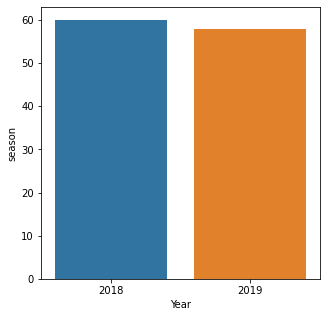

In [40]:
Season=matches['season'].unique()
Season_count=matches['season'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(5,5))
sns.barplot(x=Season,y=Season_count)
plt.xlabel('Year')
plt.show()


# shows PLot of winning teams according the data

Text(0, 0.5, 'No of winnings')

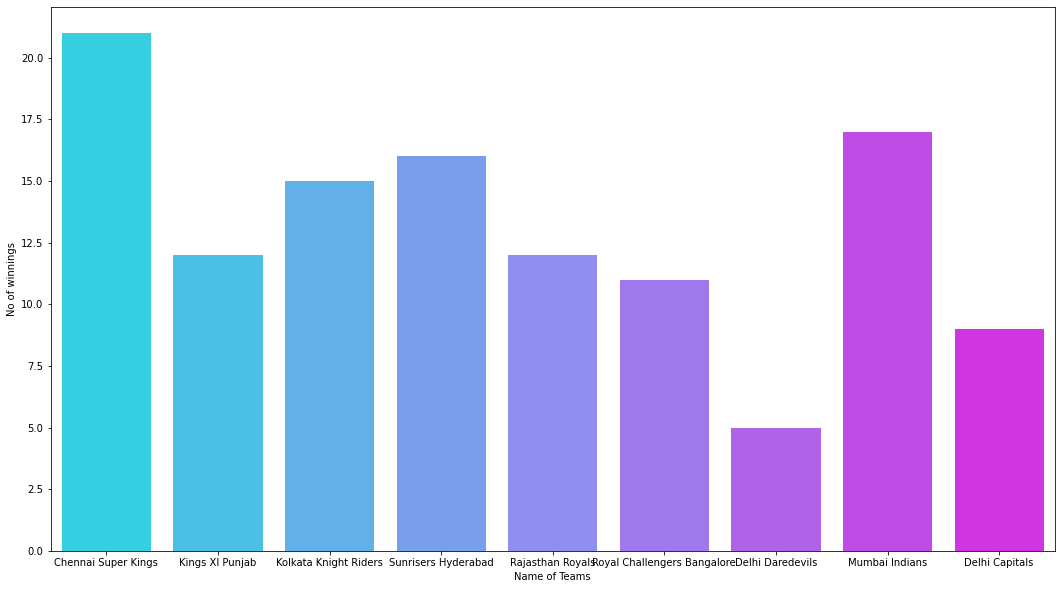

In [41]:
plt.figure(figsize=(18,10))
sns.countplot(x='winner',data=matches, palette='cool')
plt.xlabel('Name of Teams')
plt.ylabel('No of winnings')

# PLayers who played most of the times¶

Text(0, 0.5, 'Count of PLayers')

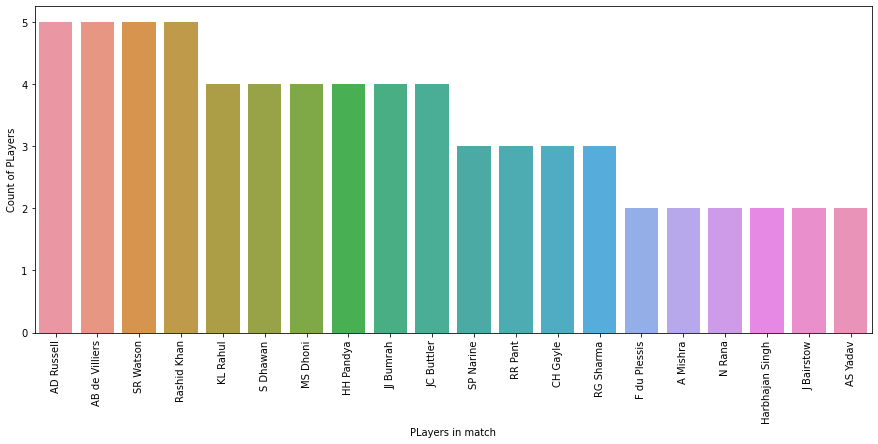

In [48]:
plt.figure(figsize=(15,6))
cities=matches['player_of_match'].value_counts().reset_index()
cities.columns=['player_of_match','count']
cities
sns.barplot(x='player_of_match',y='count', data=cities[:20])
plt.xticks(rotation=90)
plt.xlabel('PLayers in match')
plt.ylabel('Count of PLayers')

# Number of matches played in stadium

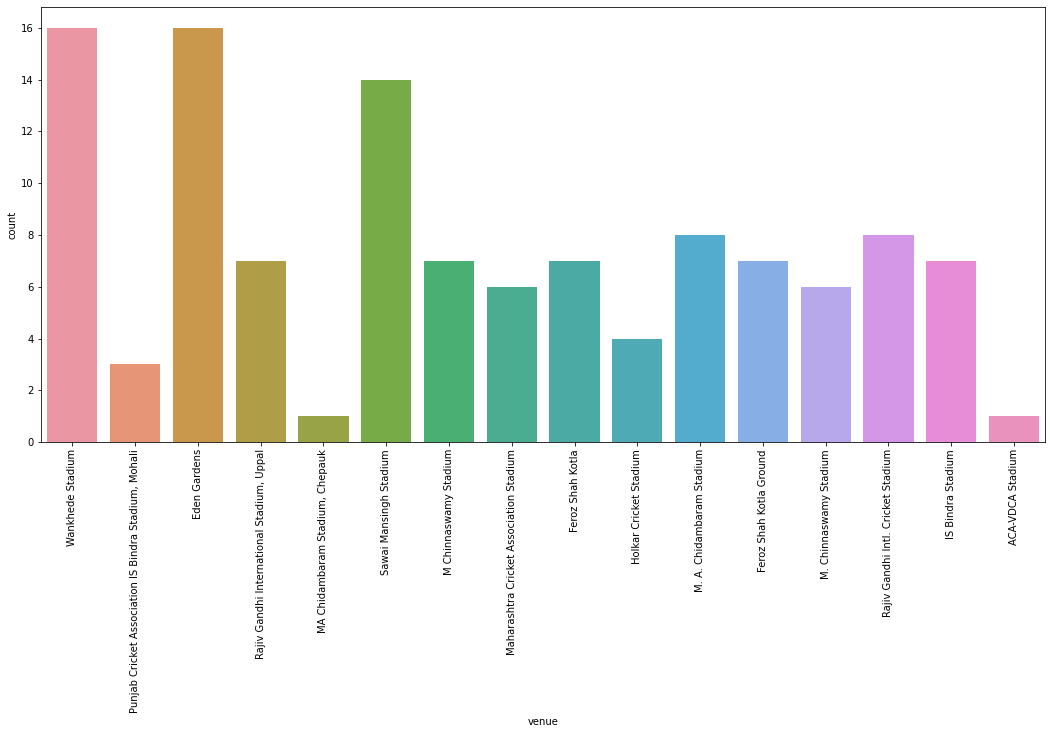

In [50]:
plt.figure(figsize=(18,8))
sns.countplot(matches['venue'])
plt.xticks(rotation=90)
plt.show()

# matches played in different cities and Stadium¶


In [53]:
venue=matches.groupby(['city','venue']).count()['season']
venue=pd.DataFrame(venue).sort_values(by='season',ascending=False)
venue

season
city          venue                                                     
Kolkata       Eden Gardens                                            16
Mumbai        Wankhede Stadium                                        16
Jaipur        Sawai Mansingh Stadium                                  14
Chennai       M. A. Chidambaram Stadium                                8
Hyderabad     Rajiv Gandhi Intl. Cricket Stadium                       8
Bengaluru     M Chinnaswamy Stadium                                    7
Delhi         Feroz Shah Kotla                                         7
              Feroz Shah Kotla Ground                                  7
Hyderabad     Rajiv Gandhi International Stadium, Uppal                7
Mohali        IS Bindra Stadium                                        7
Bengaluru     M. Chinnaswamy Stadium                                   6
Pune          Maharashtra Cricket Association Stadium                  6
Indore        Holkar Cricket Stadium                                   4
Mohali        Punjab Cricket Association IS Bindra Stadium, M...       3
Chennai       MA Chidambaram Stadium, Chepauk                          1
Visakhapatnam ACA-VDCA Stadium                                         1

# Highest run scorer¶


Text(0, 0.5, 'Runs score by Batsman')

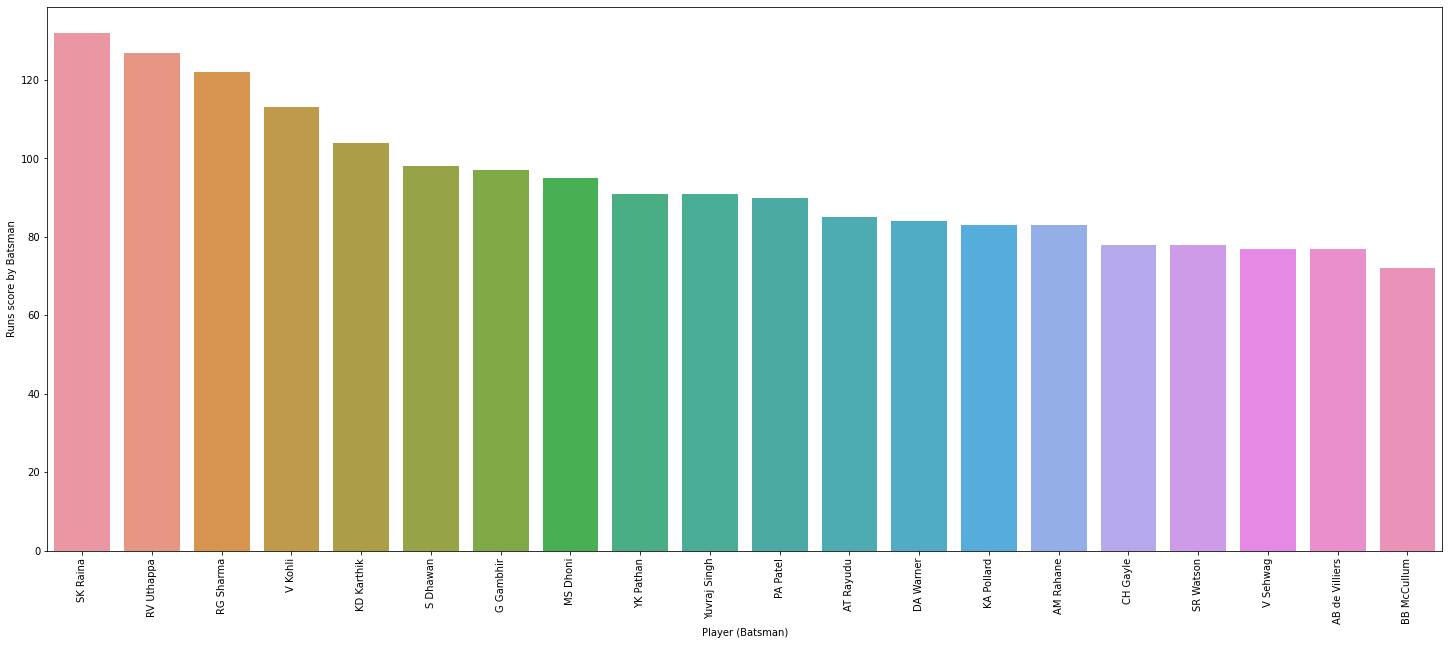

In [54]:
plt.figure(figsize=(25,10))
high_scorer=deliveries['batsman'].value_counts().reset_index()
high_scorer.columns=['batsman','batsman_runs']
sns.barplot(x='batsman',y='batsman_runs', data=high_scorer[:20])
plt.xticks(rotation=90)
plt.xlabel('Player (Batsman)')
plt.ylabel('Runs score by Batsman')

# match result by season¶


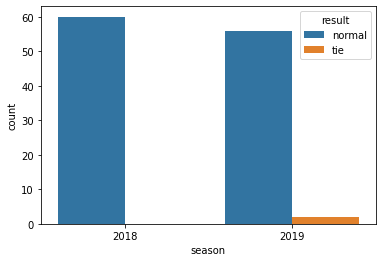

In [55]:
sns.countplot(x='season', hue='result',data=matches)
plt.show()

# toss decision


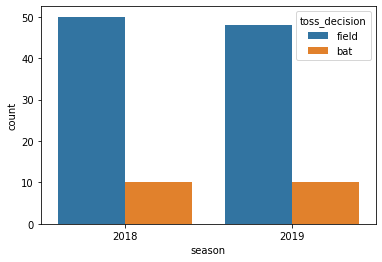

In [56]:
sns.countplot(x='season', hue='toss_decision',data=matches)
plt.show()

# Toss winnig Teams¶


Text(0, 0.5, 'Counts')

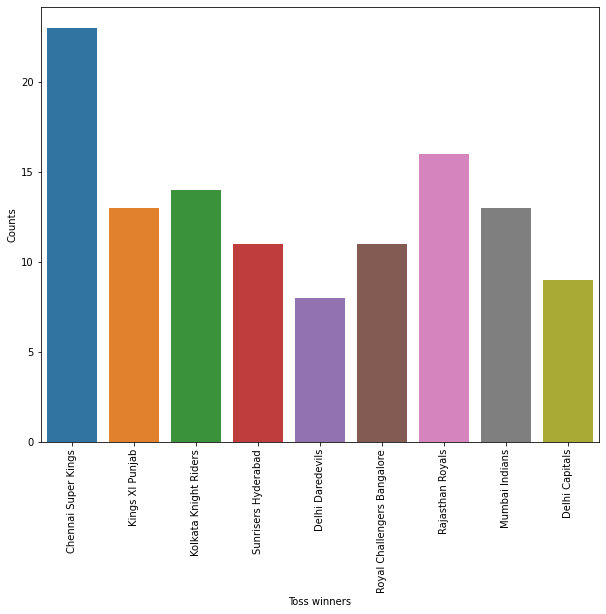

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(matches['toss_winner'])
plt.xticks(rotation=90)
plt.xlabel('Toss winners')
plt.ylabel('Counts')

# highest run scroer¶


In [58]:
top_scorers = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
477,59,DT Christian,Rising Pune Supergiant,2
852,106,CRD Fernando,Mumbai Indians,2
943,116,DPMD Jayawardene,Kings XI Punjab,2
1261,151,DPMD Jayawardene,Kings XI Punjab,2
2446,295,WD Parnell,Pune Warriors,2
2681,324,JD Ryder,Pune Warriors,2
3000,367,HH Gibbs,Mumbai Indians,2
3183,388,GH Vihari,Sunrisers Hyderabad,2
3309,401,KB Arun Karthik,Royal Challengers Bangalore,2
3682,449,KV Sharma,Sunrisers Hyderabad,2


# highest no of wins


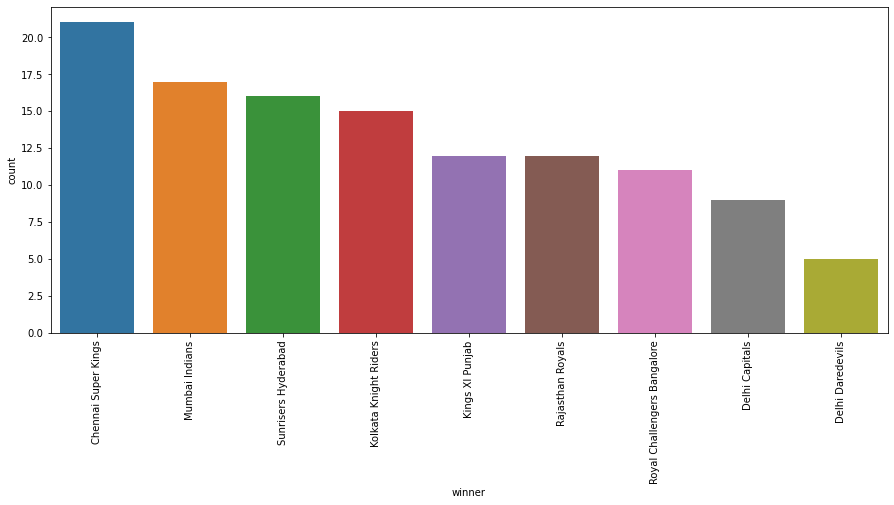

In [59]:
plt.figure(figsize=(15,6))
fav_cities = matches['winner'].value_counts().reset_index()
fav_cities.columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = fav_cities[:20])
plt.xticks(rotation=90)
plt.show()

# winner season wise¶


In [60]:

final_matches=matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
0,2018,Chennai Super Kings
1,2019,Mumbai Indians


# top player in IPL¶


<Figure size 1296x720 with 0 Axes>

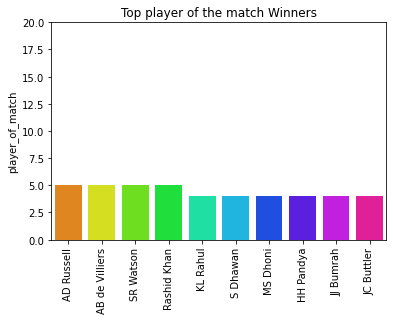

In [61]:
plt.figure(figsize = (18,10))
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

# man of the match


In [62]:
final_matches[['winner','player_of_match']].reset_index(drop=True)


,winner,player_of_match
0,Chennai Super Kings,SR Watson
1,Mumbai Indians,JJ Bumrah


# Conclusion -
1). Chennai Super Kings is the most successfull teams of the seasons
2). SR Watson, AD Russell, AB de Villies and Rashid Khan are the top players of the season who played more no of time comparing to other players.
3). Of all the teams in IPL Chennai Super Kings and Mumbai Indians are the strongest teams of the season
4). Comparing the winning teams mumbai indians and Sunriser Bangalore are almost in tie, they could have beat mumbai indians with sum score.
5). Chennai Super Kings in terms of toss winnnig are very much ahead of all the teams every time.